In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Q1
knn_train = np.loadtxt('knn-train.txt')
knn_test = np.loadtxt('knn-test.txt')

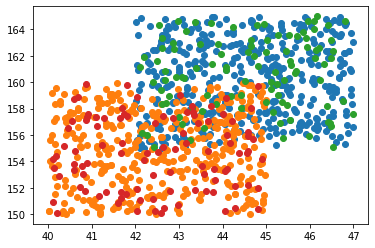

In [3]:
#Visualising the training and test data
def visualise(data):
  pos = []
  neg = []
  for i in range(data.shape[0]):
    if (data[i][2] > 0):
      pos.append([data[i][0], data[i][1]])
    else:
      neg.append([data[i][0], data[i][1]])
  pos = np.array(pos)
  neg = np.array(neg)
  plt.scatter(pos[:, 0], pos[:, 1])
  plt.scatter(neg[:, 0], neg[:, 1])

visualise(knn_train)
visualise(knn_test)

Accuracy of model for k =  1 :  88.0
Accuracy of model for k =  11 :  92.0
Accuracy of model for k =  21 :  89.5
Accuracy of model for k =  31 :  90.5
Accuracy of model for k =  41 :  91.0
Accuracy of model for k =  51 :  91.5
Accuracy of model for k =  61 :  91.5
Accuracy of model for k =  71 :  91.0
Accuracy of model for k =  81 :  90.5
Accuracy of model for k =  91 :  91.0
Accuracy of model for k =  101 :  89.5
Accuracy of model for k =  111 :  90.5
Accuracy of model for k =  121 :  90.5
Accuracy of model for k =  131 :  88.5
Accuracy of model for k =  141 :  88.5


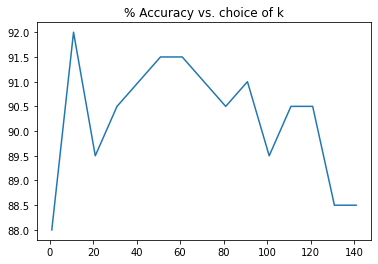

In [4]:
acclist = []
cntlist = []

#Function to find the k nearest training data points to a particular point pt
def k_neighbours(dataset, pt, k):
  dist = []
  for i in range(dataset.shape[0]):
    distance = np.linalg.norm(pt - dataset[i, :2])
    dist.append([distance, i])
  dist = np.array(sorted(dist))
  return dist[:k]

#Predicting the value using the model
def prediction(dataset, dist):
  positive = 0
  for i in range(dist.shape[0]):
    idx = int(dist[i][1])
    if (dataset[idx][2] > 0):
      positive += 1
  return 1 if (2 * positive >= dist.shape[0]) else -1

#Determining the accuracy of the model
def knn_acc(dataset, test, k):
  correct = 0
  for i in range(test.shape[0]):
    correct += (prediction(dataset, k_neighbours(dataset, test[i][:2], k)) * test[i][2] > 0)
  accuracy = 100 * correct / test.shape[0]
  print('Accuracy of model for k = ', k, ': ', accuracy)
  acclist.append(accuracy)

acclist.clear()
cntlist.clear()

for i in range(15):
  cntlist.append(i * 10 + 1)
  knn_acc(knn_train, knn_test, i * 10 + 1)

plt.title('% Accuracy vs. choice of k')
plt.plot(cntlist, acclist)

In [5]:
#Q2
perceptron_train = np.loadtxt('perceptron-train.txt')
perceptron_test = np.loadtxt('perceptron-test.txt')

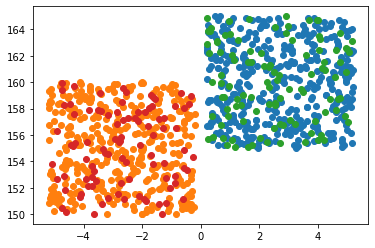

In [6]:
#Visualising the training and test data
visualise(perceptron_train)
visualise(perceptron_test)

Number of iterations for convergence:  10989
Final vector (w):  [ 0.99999928 -0.00120376]
Value of R:  164.99445948247956
Value of gamma:  0.018298438394397914
Accuracy on the test set:  100.0


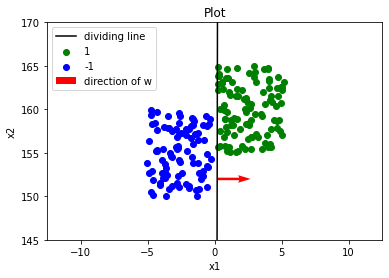

In [13]:
w = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])

def train_perceptron(w0, dataset):
  w = w0
  iter = 0
  n = dataset.shape[1] - 1
  while (1):
    missclassified = 0
    for i in range(dataset.shape[0]):
      pdt = np.dot(w, dataset[i, :n]) * dataset[i, -1]
      if (pdt <= 0):
        w = w + dataset[i, -1] * dataset[i, :n]
        missclassified = 1
        break
    if (missclassified == 0):
      break
    else:
      iter += 1
  print('Number of iterations for convergence: ', iter)
  return w

def find_r_and_gamma(w, dataset):
  r = 0
  gamma = 1e18
  n = dataset.shape[1] - 1
  for i in range(dataset.shape[0]):
    r = max(r, np.linalg.norm(dataset[i, :n]))
    gamma = min(gamma, (dataset[i, -1] * np.dot(w, dataset[i, :n])))
  print('Value of R: ', r)
  print('Value of gamma: ', gamma)

def prcpt_acc(w, dataset):
  correct = 0
  n = dataset.shape[1] - 1
  for i in range(dataset.shape[0]):
    if (dataset[i, -1] * np.dot(w, dataset[i, :n]) > 0):
      correct += 1
  accuracy = 100 * correct / dataset.shape[0]
  print('Accuracy on the test set: ', accuracy)

def plot_everything(w, dataset):
  plt.title('Plot')
  pos = []
  neg = []
  for i in range(dataset.shape[0]):
    if (dataset[i][2] > 0):
      pos.append([dataset[i][0], dataset[i][1]])
    else:
      neg.append([dataset[i][0], dataset[i][1]])
  pos = np.array(pos)
  neg = np.array(neg)
  plt.xlabel('x1')
  plt.ylabel('x2')
  x = np.linspace(-5, 5, 100)
  plt.plot(x, -w[0] / w[1] * x, color = 'black', label = 'dividing line')
  coord = [-w[1] * 152 / w[0], 152]
  plt.xlim(-12.5, 12.5)
  plt.ylim(145, 170)
  plt.scatter(pos[:, 0], pos[:, 1], c = 'g', label = '1')
  plt.scatter(neg[:, 0], neg[:, 1], c = 'b', label = '-1')
  plt.quiver(*coord, 100 * w[0], 100 * w[1], color = 'red', label = 'direction of w', scale = 1000)
  plt.legend()

w = train_perceptron(np.array([0, 0]), perceptron_train)
w = w / np.linalg.norm(w)
print('Final vector (w): ', w)
find_r_and_gamma(w, perceptron_train)
prcpt_acc(w, perceptron_test)
plot_everything(w, perceptron_test)

In [14]:
#Q3
bias_train = np.loadtxt('perceptron-biased-train.txt')
bias_test = np.loadtxt('perceptron-biased-test.txt')

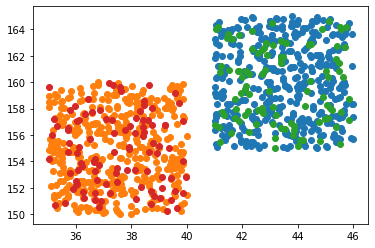

In [15]:
#Visualising the training and test data
visualise(bias_train)
visualise(bias_test)

Number of iterations for convergence:  4656249
Final vector (w):  [ 0.03616576 -0.00295188 -0.99934145]
Value of R:  170.87452504795516
Value of gamma:  4.522214080981968e-07
Accuracy on the test set:  100.0


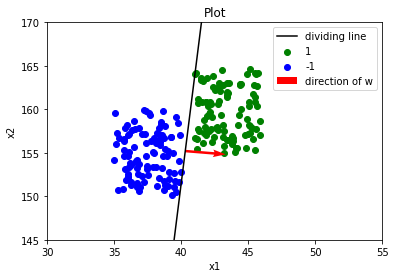

In [16]:
#w = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)])
             
def padding(dataset):
  new_dataset = np.ones([dataset.shape[0], dataset.shape[1] + 1])
  for i in range(dataset.shape[0]):
    for j in range(dataset.shape[1] - 1):
      new_dataset[i][j] = dataset[i][j]
    new_dataset[i, -1] = dataset[i, -1]
  return new_dataset

data = padding(bias_train)
test_data = padding(bias_test)

def plot_everything_2(w, dataset):
  plt.title('Plot')
  pos = []
  neg = []
  for i in range(dataset.shape[0]):
    if (dataset[i][3] > 0):
      pos.append([dataset[i][0], dataset[i][1]])
    else:
      neg.append([dataset[i][0], dataset[i][1]])
  pos = np.array(pos)
  neg = np.array(neg)
  plt.xlabel('x1')
  plt.ylabel('x2')
  x = np.linspace(30, 50, 100)
  plt.plot(x, -w[0] / w[1] * x - (w[2] / w[1]), color = 'black', label = 'dividing line')
  coord = [40.3, -w[0] / w[1] * 40.3 - (w[2] / w[1])]
  plt.xlim(30, 55)
  plt.ylim(145, 170)
  plt.scatter(pos[:, 0], pos[:, 1], c = 'g', label = '1')
  plt.scatter(neg[:, 0], neg[:, 1], c = 'b', label = '-1')
  plt.quiver(*coord, 100 * w[0], 100 * w[1], color = 'red', label = 'direction of w', scale = 30)
  plt.legend()

#takes a very long time to converge (4.6 million iterations?!)
w = train_perceptron(np.array([0, 0, 0]), data)
w = w / np.linalg.norm(w)
print('Final vector (w): ', w)

#w = np.array([0.03617382, -0.00295406, -0.99934115])
find_r_and_gamma(w, data)
prcpt_acc(w, test_data)
plot_everything_2(w, test_data)